# Questions
1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?

2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?

4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?

5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?

6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?

7. Which lessons are least accessed? 

8. Anything else I should be aware of?

In [205]:
import pandas as pd 
import numpy as np 
import env
import matplotlib.pyplot as plt
import seaborn as sns
import wrangle

In [148]:
#Acquire 
def cohort_data():
    '''
    This function reads the curriculum data from the mySQL database into a df.
    '''
    #url to connect to codeup servers
    url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/curriculum_logs'
    # Create SQL query.
    sql_query = '''
    SELECT 
        date,
        time,
        ip,
        path,
        user_id,
        cohort_id,
        name as cohort_name,
        slack,
        start_date,
        end_date,
        program_id
    FROM
        curriculum_logs.logs
    join
        curriculum_logs.cohorts on cohort_id = id
    ;
    '''
    # Read in DataFrame from Codeup db.
    df = pd.read_sql(sql_query, url)
    
    return df

In [149]:
df=cohort_data()

In [150]:
#preparing data 
def prep_data(df):
    '''
    This function takes in a messy dataframe and return the cleaned verison of dataframe.
    Detial steps are in code comment below.
    '''
    # Change date columns to datetime
    df.date = pd.to_datetime(df.date)
    df.start_date = pd.to_datetime(df.start_date)
    df.end_date = pd.to_datetime(df.end_date)
    # Set date columns as datatime as index
    df = df.set_index(df.date)
    
    # Drop null values
    df = df.dropna()

    # Encode program_id
    df['program'] = df.program_id.map({1: 'Full Stack ', 2: 'Full Stack Java', 3: 'Data Science', 4: 'Front'})
    
    # Drop columns not import to me

    return df

In [151]:
df=prep_data(df)

In [61]:
df=df.dropna()

In [84]:
df=df.drop(columns=['time'])

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 847329 entries, 2018-01-26 to 2021-04-21
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   date       847329 non-null  datetime64[ns]
 1   path       847329 non-null  object        
 2   user_id    847329 non-null  int64         
 3   cohort_id  847329 non-null  float64       
 4   ip         847329 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 38.8+ MB


In [87]:
df.head()

,date,path,user_id,cohort_id,ip
date,,,,,
2018-01-26,2018-01-26,/,1,8.0,97.105.19.61
2018-01-26,2018-01-26,java-ii,1,8.0,97.105.19.61
2018-01-26,2018-01-26,java-ii/object-oriented-programming,1,8.0,97.105.19.61
2018-01-26,2018-01-26,slides/object_oriented_programming,1,8.0,97.105.19.61
2018-01-26,2018-01-26,javascript-i/conditionals,2,22.0,97.105.19.61


# 1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?

In [93]:
#total number of unique path ways 
df.path.nunique()

2224

In [115]:
#139 cohorts
df.cohort_id.unique()

array([  8.,  22.,  21.,   1.,  16.,  18.,  19.,  13.,  14.,  15.,   7.,
         4.,  12.,  17.,  23.,   2.,   9.,  11.,  24.,  25.,  26.,   6.,
        27.,  28.,  29.,  31.,  32.,  33.,  34.,  51.,  52.,  53.,  55.,
        56.,  57.,   5.,  58.,  59.,  61.,  62., 132., 134., 133., 135.,
       138., 137., 139.])

In [118]:
#value count for all path and users 
coc=df.groupby(['cohort_id','path','user_id']).value_counts()
coc=pd.DataFrame(coc)
coc

0
cohort_id path user_id date       ip               
1.0       /    11      2018-09-21 97.105.19.58    6
                       2018-05-31 97.105.19.61    6
                       2018-03-05 76.185.131.226  5
                       2018-01-29 97.105.19.61    4
                       2018-05-10 97.105.19.61    4
...                                              ..
139.0     toc  978     2021-04-18 73.85.64.161    1
                       2021-04-15 73.85.64.161    1
                       2021-04-13 73.85.64.161    1
                       2021-04-12 73.85.64.161    1
               979     2021-04-12 107.77.217.122  3

[520382 rows x 1 columns]

In [121]:
coc.mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of                                                   0
cohort_id path user_id date       ip               
1.0       /    11      2018-09-21 97.105.19.58    6
                       2018-05-31 97.105.19.61    6
                       2018-03-05 76.185.131.226  5
                       2018-01-29 97.105.19.61    4
                       2018-05-10 97.105.19.61    4
...                                              ..
139.0     toc  978     2021-04-18 73.85.64.161    1
                       2021-04-15 73.85.64.161    1
                       2021-04-13 73.85.64.161    1
                       2021-04-12 73.85.64.161    1
               979     2021-04-12 107.77.217.122  3

[520382 rows x 1 columns]>

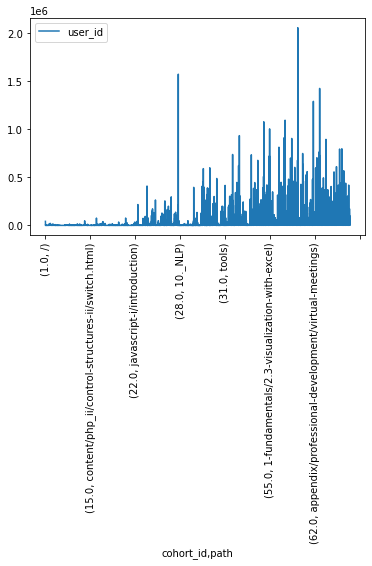

In [80]:
coc.plot()
plt.xticks(rotation=90)
plt.show()

In [196]:
pd.DataFrame(df.loc[df.program_id==1]).path.value_counts()

/                        1681
index.html               1011
javascript-i              736
html-css                  542
spring                    501
                         ... 
4.0_overview                1
4.1_introduction            1
4.4_functions               1
4.5_imports                 1
ajax-api-request.html       1
Name: path, Length: 710, dtype: int64

Text(0.5, 1.0, 'Top 10 Accessed Pages for Web Development Program')

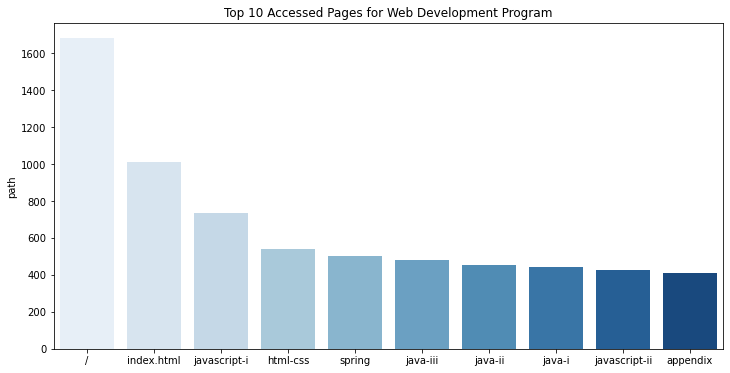

In [201]:
p1 = pd.DataFrame(df.loc[df.program_id==1].path.value_counts().nlargest(10))
plt.figure(figsize = (12,6))
sns.barplot(x=p1.index, y=p1.path,palette = 'Blues')
plt.title('Top 10 Accessed Pages for Web Development Program')

Text(0.5, 1.0, 'Top 10 Accessed Pages for Web Development java Program')

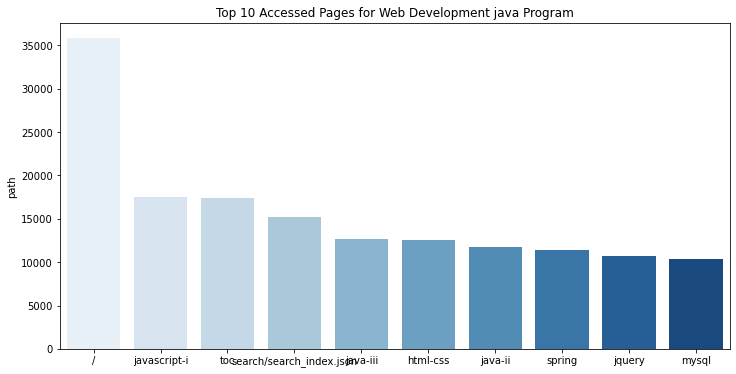

In [202]:
p2 = pd.DataFrame(df.loc[df.program_id==2].path.value_counts().nlargest(10))
plt.figure(figsize = (12,6))
sns.barplot(x=p2.index, y=p2.path, palette = 'Blues')
plt.title('Top 10 Accessed Pages for Web Development java Program')

Text(0.5, 1.0, 'Top 5 Accessed Pages for Data Science Program')

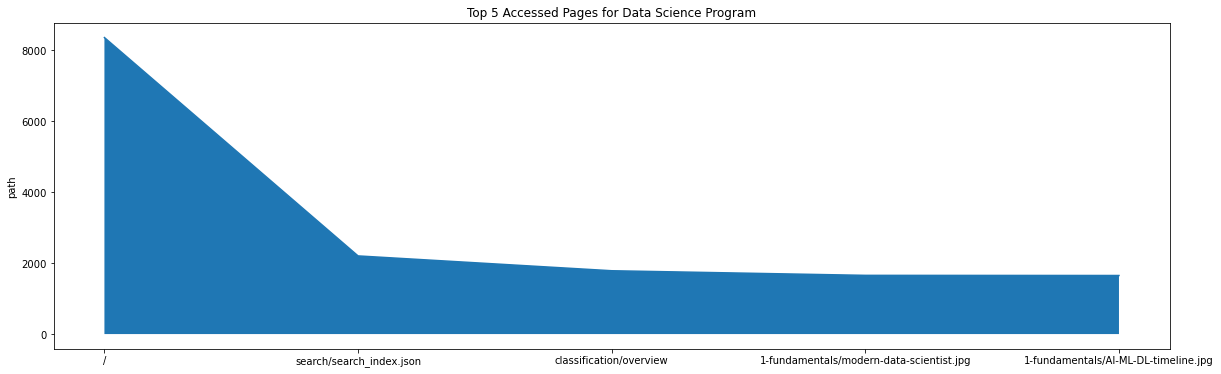

In [188]:
p3 = pd.DataFrame(df.loc[df.program_id==3].path.value_counts().nlargest(5))
plt.figure(figsize = (20,6))
sns.lineplot(x=p3.index, y=p3.path)
plt.fill_between(p3.index, p3.path)
plt.title('Top 5 Accessed Pages for Data Science Program')

Text(0.5, 1.0, 'Top 4 Accessed Pages for Front End Program')

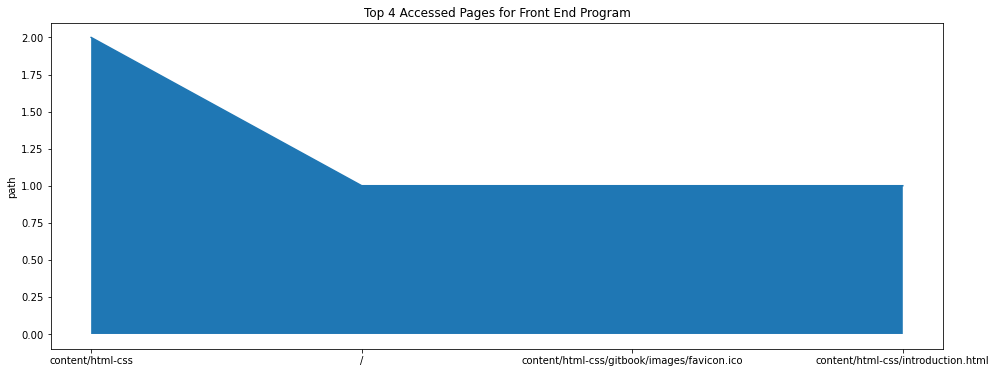

In [187]:
p4 = pd.DataFrame(df.loc[df.program_id==4].path.value_counts().nlargest(5))
plt.figure(figsize = (16,6))
sns.lineplot(x=p4.index, y=p4.path)
plt.fill_between(p4.index, p4.path)
plt.title('Top 4 Accessed Pages for Front End Program')

In [ ]:
def q1_p1(df):
    '''
    This function plots the top accessed pages for full stack php, web dep program
    '''
    p1 = pd.DataFrame(df.loc[df.program_id==1].path.value_counts().nlargest(10))
    plt.figure(figsize = (12,6))
    sns.barplot(x=p1.index, y=p1.path, palette = 'mako')
    plt.title('Top 10 Accessed Pages for Web Development (PHP) Program')

def q1_p2(df):
    '''
    This function plots the top accessed pages for full stack java, web dep program
    '''
    p2 = pd.DataFrame(df.loc[df.program_id==2].path.value_counts().nlargest(10))
    plt.figure(figsize = (12,6))
    sns.barplot(x=p2.index, y=p2.path, palette = 'mako')
    plt.title('Top 10 Accessed Pages for Web Development (Java) Program')

def q1_p3(df):
    '''
    This function plots the top accessed pages for data science program
    '''
    p3 = pd.DataFrame(df.loc[df.program_id==3].path.value_counts().nlargest(5))
    plt.figure(figsize = (20,6))
    sns.barplot(x=p3.index, y=p3.path, palette = 'mako')
    plt.title('Top 5 Accessed Pages for Data Science Program')

def q1_p4(df):
    '''
    This function plots the top accessed pages for data science program
    '''
    p4 = pd.DataFrame(df.loc[df.program_id==4].path.value_counts().nlargest(10))
    plt.figure(figsize = (16,6))
    sns.barplot(x=p4.index, y=p4.path, palette = 'mako')
    plt.title('Top 4 Accessed Pages for Front End Program')

# 2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?



/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


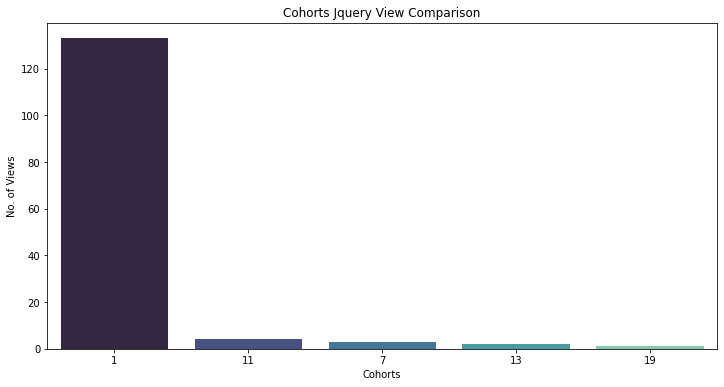

In [197]:
    # bar chart comparing jquery 
x = ['1', '11', '7', '13', '19']
y = [133, 4, 3, 2, 1]

fig = plt.figure(figsize = (12,6))
sns.barplot(x, y, palette ='mako')
    
plt.xlabel("Cohorts")
plt.ylabel("No. of Views")
plt.title("Cohorts Jquery View Comparison")
plt.show()



/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


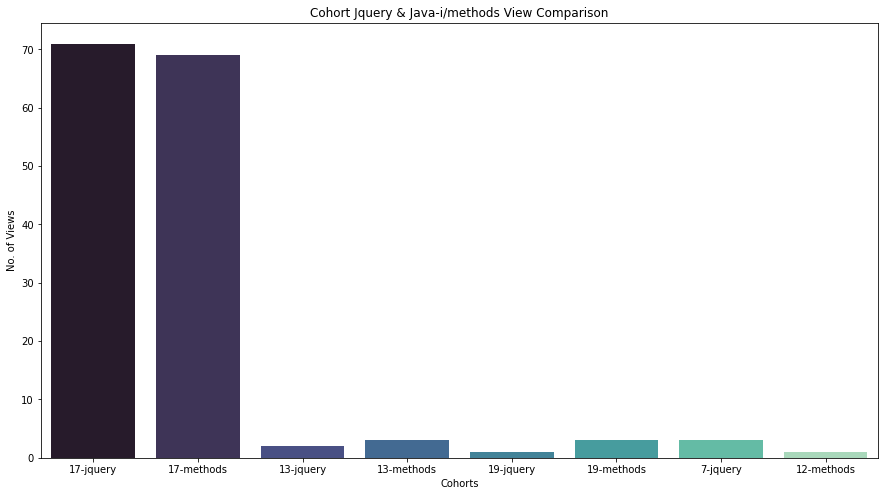

In [198]:
x = ['17-jquery', '17-methods', '13-jquery', '13-methods', '19-jquery', '19-methods', '7-jquery', '12-methods']
y = [71, 69, 2, 3, 1, 3, 3, 1]

fig = plt.figure(figsize = (15, 8))
sns.barplot(x, y, palette='mako')
    
plt.xlabel("Cohorts")
plt.ylabel("No. of Views")
plt.title("Cohort Jquery & Java-i/methods View Comparison")
plt.show()

In [ ]:
def q2_p1():
    '''
    This function plots the full stack php program jquery view comparison
    '''
    # bar chart comparing jquery 
    x = ['1', '11', '7', '13', '19']
    y = [133, 4, 3, 2, 1]

    fig = plt.figure(figsize = (12,6))
    sns.barplot(x, y, palette ='mako')
    
    plt.xlabel("Cohorts")
    plt.ylabel("No. of Views")
    plt.title("Cohorts Jquery View Comparison")
    plt.show()

def q2_p2():
    '''
    This function plots the full stack php program jquery & java-i/methods view comparison
    '''
    # bar chart comparing cohort 17 and others 
    x = ['17-jquery', '17-methods', '13-jquery', '13-methods', '19-jquery', '19-methods', '7-jquery', '12-methods']
    y = [71, 69, 2, 3, 1, 3, 3, 1]

    fig = plt.figure(figsize = (15, 8))
    sns.barplot(x, y, palette='mako')
    
    plt.xlabel("Cohorts")
    plt.ylabel("No. of Views")
    plt.title("Cohort Jquery & Java-i/methods View Comparison")
    plt.show()

# 3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?

# 4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?

In [208]:
df = wrangle.cohort_data()
df = wrangle.prep_data(df)

In [209]:
pages = df['path'].resample('d').count()
pages.head()

date
2018-01-26    533
2018-01-27    230
2018-01-28    168
2018-01-29    783
2018-01-30    614
Freq: D, Name: path, dtype: int64

In [210]:
ip = pd.DataFrame(df.groupby('user_id').ip.nunique(), columns = ['ip'])

In [211]:
q1 = ip['ip'].quantile(0.25)
q3 = ip['ip'].quantile(0.75)
iqr = q3-q1
upper_bound = q3 + 3*iqr
lower_bound = q1
upper_bound, lower_bound

(30.0, 2.0)

In [212]:
ip.sort_values(by = 'ip', ascending=False).head(15)

,ip
user_id,
228,148
843,126
533,92
690,88
530,86
226,83
460,82
590,75
127,67


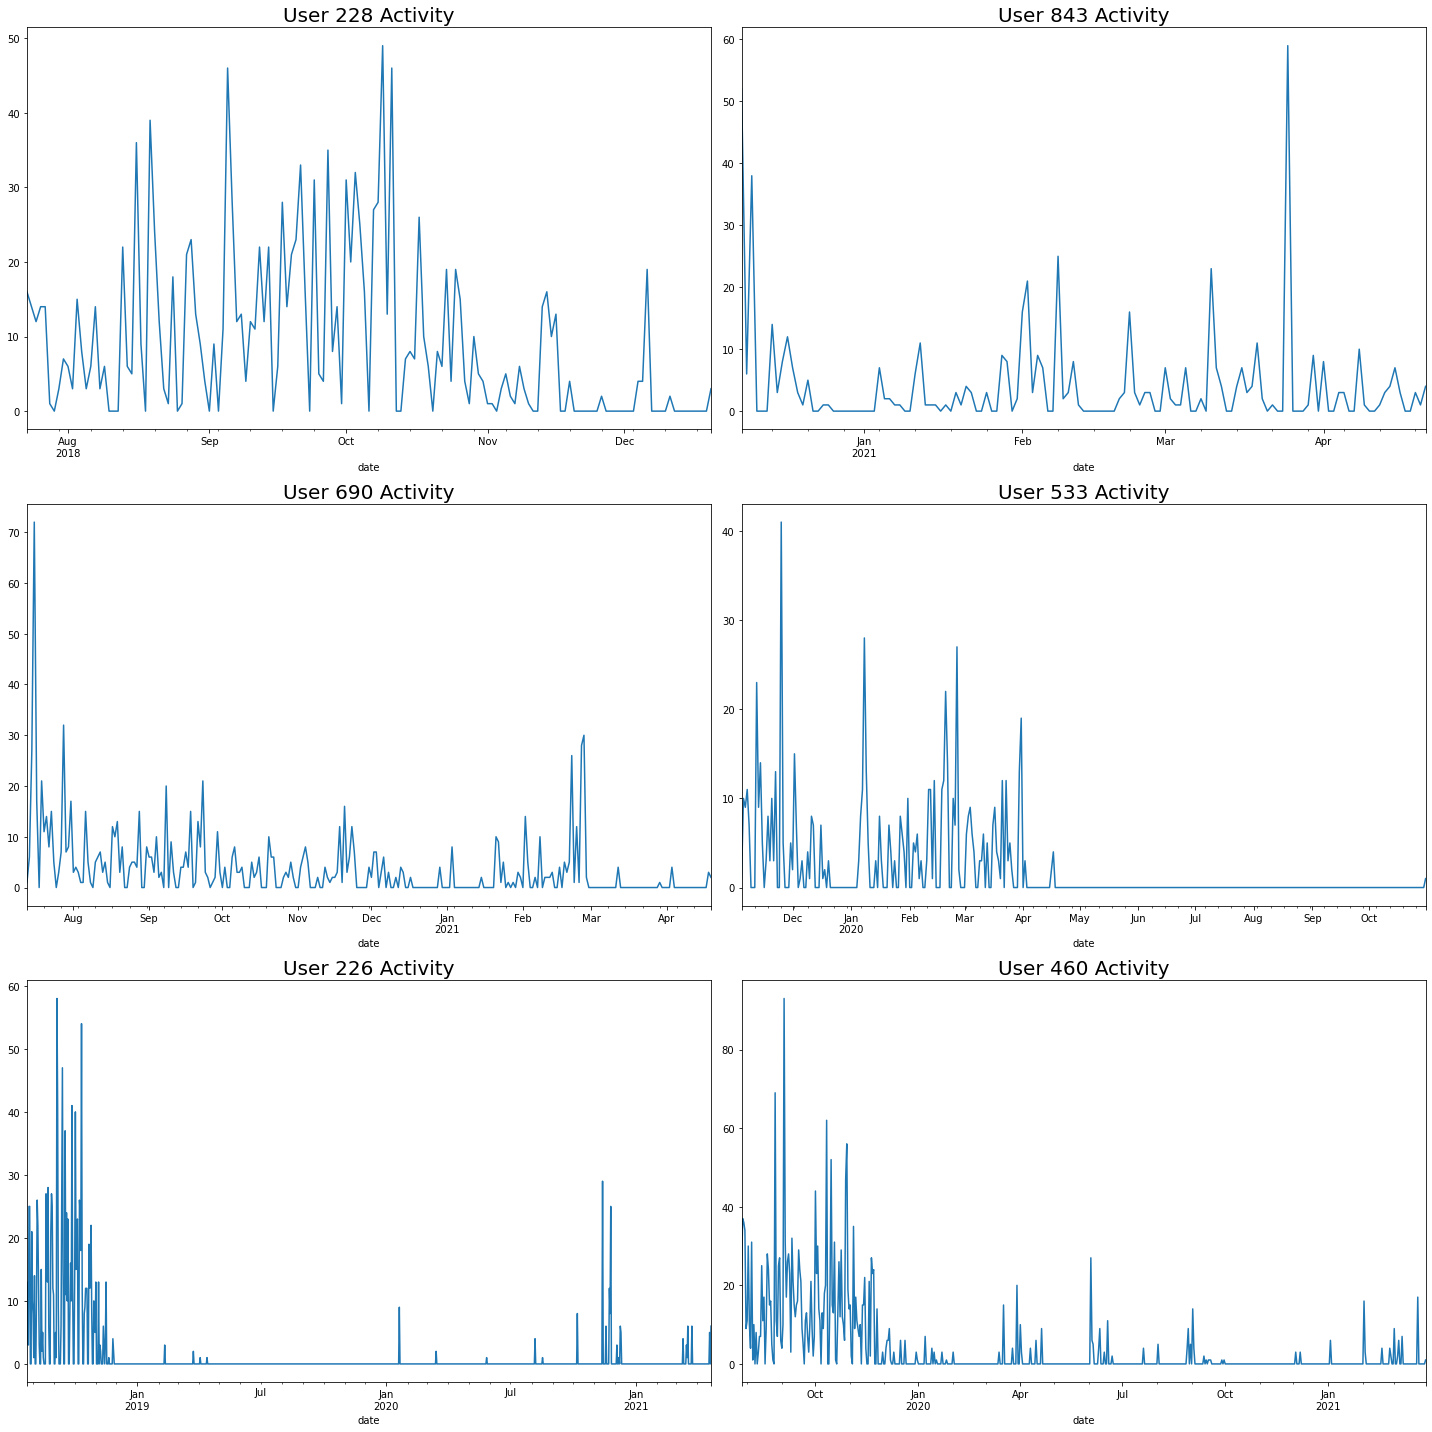

In [225]:
# Top 6 abnormal users
plt.figure(figsize = (20,20))
plt.subplot(321)
pages_228 = df[df.user_id == 228]['path'].resample('d').count()
pages_228.plot()
plt.title('User 228 Activity', fontsize = 20)

plt.subplot(322)
pages_843 = df[df.user_id == 843]['path'].resample('d').count()
pages_843.plot()
plt.title('User 843 Activity', fontsize = 20)

plt.subplot(323)
pages_690 = df[df.user_id == 690]['path'].resample('d').count()
pages_690.plot()
plt.title('User 690 Activity', fontsize = 20)

plt.subplot(324)
pages_533 = df[df.user_id == 533]['path'].resample('d').count()
pages_533.plot()
plt.title('User 533 Activity', fontsize = 20)

plt.subplot(325)
pages_226 = df[df.user_id == 226]['path'].resample('d').count()
pages_226.plot()
plt.title('User 226 Activity', fontsize = 20)

plt.subplot(326)
pages_460 = df[df.user_id == 460]['path'].resample('d').count()
pages_460.plot()
plt.title('User 460 Activity', fontsize = 20)
plt.tight_layout()

# 5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?

# 6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?

In [215]:
df.end_date = pd.to_datetime(df.end_date)

In [219]:
passed = pd.DataFrame(df[df.date>df.end_date].program.value_counts())
passed

,program
Full Stack Java,157786
Full Stack,30548
Data Science,11495
Front,5


Text(0, 0.5, 'No. of Log Entry')

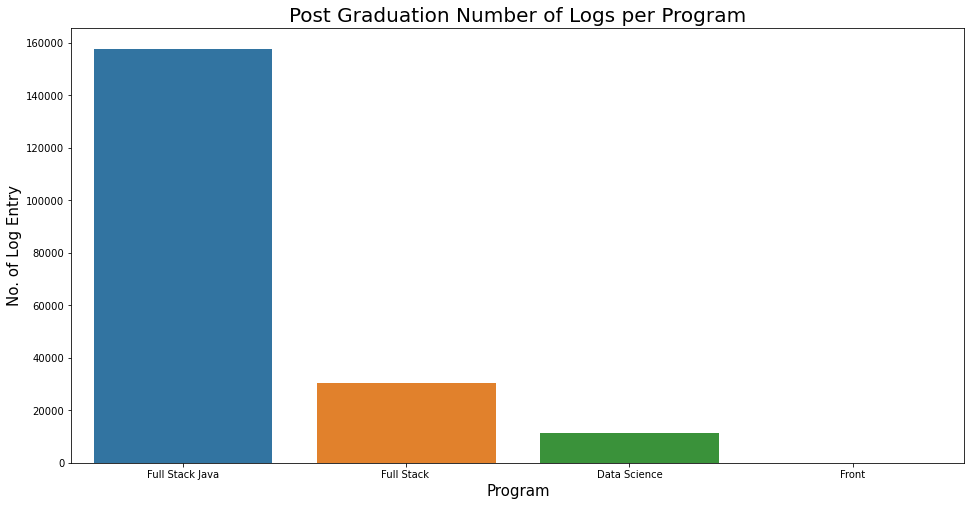

In [220]:
# Visualizing number of entry
plt.figure(figsize=(16,8))
sns.barplot(x=passed.index, y=passed.program)
plt.title('Post Graduation Number of Logs per Program', fontsize = 20)
plt.xlabel('Program', fontsize = 15)
plt.ylabel('No. of Log Entry', fontsize = 15)

In [223]:
p1 = pd.DataFrame(df[(df.date>df.end_date)&(df.program_id == 1)].path.value_counts().head(10))
p1

,path
/,1681
index.html,1011
javascript-i,736
html-css,542
spring,501
java-iii,479
java-ii,454
java-i,444
javascript-ii,429
appendix,409


Text(0, 0.5, 'No. of Log Entry')

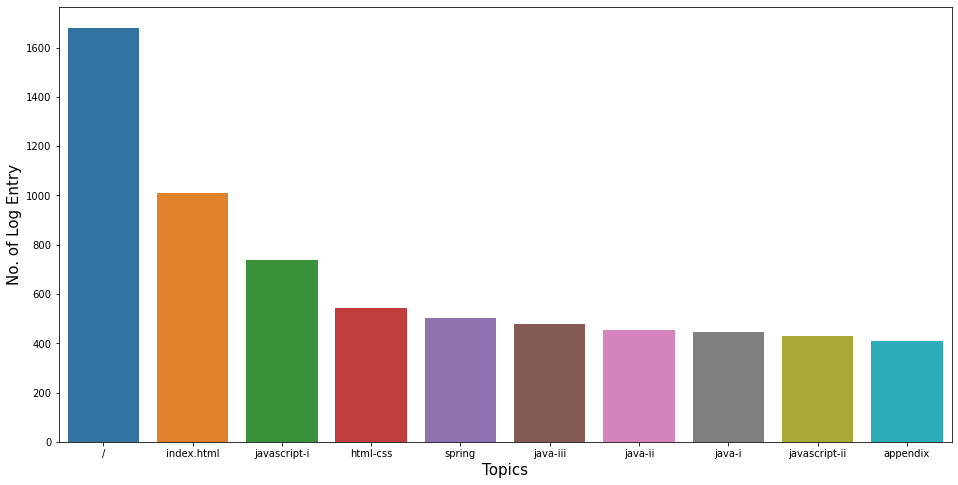

In [222]:
# Visualizing full stack java most frequent lesson
plt.figure(figsize=(16,8))
sns.barplot(x=p1.index, y=p1.path)
plt.xlabel('Topics', fontsize = 15)
plt.ylabel('No. of Log Entry', fontsize = 15)

# 7. Which lessons are least accessed? 